<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Keep part in this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

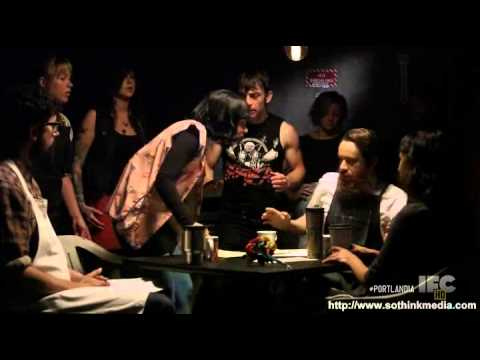

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'C:\\Users\\showi\\Documents\\Lambda School\\Week 13 NLP\\DS-Unit-4-Sprint-1-NLP\\module1-text-data'

In [6]:
from collections import Counter
import re
 
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

nlp = spacy.load("en_core_web_lg")

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [7]:
shops.shape

(7616, 3)

In [48]:
# Inspect first review
shops['full_review_text'][0]

' 11/25/2016 1 check-in Love love loved the atmosphere! Every corner of the coffee shop had its own style, and there were swings!!! I ordered the matcha latte, and it was muy fantastico! Ordering and getting my drink were pretty streamlined. I ordered on an iPad, which included all beverage selections that ranged from coffee to wine, desired level of sweetness, and a checkout system. I got my latte within minutes!  I was hoping for a typical heart or feather on my latte, but found myself listing out all the possibilities of what the art may be. Any ideas? '

In [49]:
shops.coffee_shop_name.value_counts()

Epoch Coffee                            400
Halcyon                                 300
The Factory - Cafe With a Soul          244
Venezia Italian Gelato                  200
Houndstooth Coffee                      200
Caffé Medici                            143
Apanas Coffee & Beer                    136
Pacha                                   100
La Tazza Fresca                         100
Kick Butt Coffee Music & Booze          100
TOMS                                    100
The Buzz Mill                           100
Cherrywood Coffeehouse                  100
Teo                                     100
Jo’s Coffee                             100
Thunderbird Coffee                      100
Sa-Ten                                  100
Summermoon Coffee Bar                   100
Dolce Neve                              100
Corona Coffee                           100
Arturo’s Underground Cafe               100
Radio Coffee & Beer                     100
Irie Bean Coffee Bar            

In [8]:
def clean(df):
    """Function to clean data for NLP analysis"""
    
    df = df.copy()
    # Remove leading and trailing white space
    df['full_review_text'] = df['full_review_text'].apply(lambda x: x.strip())
    
    # Move dates in reviews to new column
    df['review_date'] = df['full_review_text'].apply(lambda x: x.split()[0])
    
    # Remove dates from review text
    df['full_review_text'] = df['full_review_text'].apply(lambda x: ' '.join(x.split()[1:]))
    
    # Remove check-ins from review text
    df['full_review_text'] = df['full_review_text'].apply(lambda x: ' '.join(x.split()[2:])
                                                         if x.split()[1] == 'check-in'
                                                         or x.split()[1] == 'check-ins'
                                                         else x)
    
    # Convert review text to lowercase
    df['full_review_text'] = df['full_review_text'].apply(lambda x: x.lower())
    
    # Remove text from star rating and convert rating to int
    df['star_rating'] = df['star_rating'].apply(lambda x: x.split('.')[0]).astype('int')
    
    df['coffee_shop_name'] = df['coffee_shop_name'].str.strip()
    
    return df

In [9]:
shops = clean(shops)
shops.head()

,coffee_shop_name,full_review_text,star_rating,review_date
0,The Factory - Cafe With a Soul,love love loved the atmosphere! every corner o...,5,11/25/2016
1,The Factory - Cafe With a Soul,"listed in date night: austin, ambiance in aust...",4,12/2/2016
2,The Factory - Cafe With a Soul,listed in brunch spots i loved the eclectic an...,4,11/30/2016
3,The Factory - Cafe With a Soul,very cool decor! good drinks nice seating howe...,2,11/25/2016
4,The Factory - Cafe With a Soul,they are located within the northcross mall sh...,4,12/3/2016


In [11]:
shops = shops[shops['coffee_shop_name'] == 'Venezia Italian Gelato']
print(shops.shape)
shops.head()

(200, 4)


,coffee_shop_name,full_review_text,star_rating,review_date
901,Venezia Italian Gelato,this place looks very unassuming on the outsid...,5,10/21/2016
902,Venezia Italian Gelato,mmmm the gelato is so tasty! i came here for a...,4,11/19/2016
903,Venezia Italian Gelato,if you're looking for a relaxing european coff...,5,10/19/2016
904,Venezia Italian Gelato,cute little shop run by a gorgeoussssss couple...,4,8/31/2016
905,Venezia Italian Gelato,i don't know. there seems to be another gelato...,4,7/14/2016


In [ ]:
shops.groupby('coffee_shop_name').agg({"star_rating":"mean"})

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [12]:
shops['review_rating'] = shops['star_rating'].replace({1:'bad', 2:'bad', 3:'bad', 4:'good', 5:'good'})
shops.head()

,coffee_shop_name,full_review_text,star_rating,review_date,review_rating
901,Venezia Italian Gelato,this place looks very unassuming on the outsid...,5,10/21/2016,good
902,Venezia Italian Gelato,mmmm the gelato is so tasty! i came here for a...,4,11/19/2016,good
903,Venezia Italian Gelato,if you're looking for a relaxing european coff...,5,10/19/2016,good
904,Venezia Italian Gelato,cute little shop run by a gorgeoussssss couple...,4,8/31/2016,good
905,Venezia Italian Gelato,i don't know. there seems to be another gelato...,4,7/14/2016,good


In [13]:
# Tokenizer pipe
tokens = []

for doc in nlp.pipe(shops['full_review_text']):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())
            
    tokens.append(doc_tokens)
    
shops['tokens'] = tokens

In [14]:
STOPWORDS = nlp.Defaults.stop_words.union([' ', 'listed', 'coffee', 'shop'])

def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)
    
    # Something goes here :P
    for token in doc: 
        if ((token.text not in STOPWORDS) and (token.is_punct == False)) and (token.pos_!= 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

In [15]:
shops['lemmas'] = shops['full_review_text'].apply(get_lemmas)

In [16]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,review_date,review_rating,tokens,lemmas
901,Venezia Italian Gelato,this place looks very unassuming on the outsid...,5,10/21/2016,good,"[this, place, looks, very, unassuming, on, the...","[place, look, unassuming, outside, nice, quain..."
902,Venezia Italian Gelato,mmmm the gelato is so tasty! i came here for a...,4,11/19/2016,good,"[mmmm, the, gelato, is, so, tasty, i, came, he...","[mmmm, gelato, tasty, come, dessert, date, teq..."
903,Venezia Italian Gelato,if you're looking for a relaxing european coff...,5,10/19/2016,good,"[if, you, 're, looking, for, a, relaxing, euro...","[be, look, relaxing, european, experience, mid..."
904,Venezia Italian Gelato,cute little shop run by a gorgeoussssss couple...,4,8/31/2016,good,"[cute, little, shop, run, by, a, gorgeoussssss...","[cute, little, run, gorgeoussssss, couple, mai..."
905,Venezia Italian Gelato,i don't know. there seems to be another gelato...,4,7/14/2016,good,"[i, do, n't, know, there, seems, to, be, anoth...","[not, know, gelato, place, south, austin, pop,..."


In [17]:
def count(docs):
    """Function to find word counts within a document"""
    word_counts = Counter()
    appears_in = Counter()
    
    total_docs = len(docs)
    
    for doc in docs:
        word_counts.update(doc)
        appears_in.update(set(doc))
        
    temp = zip(word_counts.keys(), word_counts.values())
    
    wc = pd.DataFrame(temp, columns=['word', 'count'])
    
    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()
    
    wc['pct_total'] = wc['count'].apply(lambda x: x / total)
    
    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()
    
    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    wc = ac.merge(wc, on='word')
    
    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
    
    return wc.sort_values(by='rank')

In [18]:
wc = count(shops['lemmas'])

In [23]:
wc.head(10)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
32,gelato,184,416,1.0,0.053102,0.053102,0.92
66,flavor,90,172,2.0,0.021956,0.075057,0.45
68,place,108,158,3.0,0.020168,0.095226,0.54
20,good,102,150,4.0,0.019147,0.114373,0.51
27,be,72,126,5.0,0.016084,0.130457,0.36
39,owner,86,98,6.0,0.012510,0.142967,0.43
56,not,60,98,7.0,0.012510,0.155476,0.30
25,try,62,86,8.0,0.010978,0.166454,0.31
35,italian,66,80,9.0,0.010212,0.176666,0.33
173,great,58,80,10.0,0.010212,0.186878,0.29


In [19]:
wc.tail(10)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
1082,deliciously,2,2,1086.0,0.000255,0.997702,0.01
1087,oversweet,2,2,1087.0,0.000255,0.997958,0.01
1086,number,2,2,1088.0,0.000255,0.998213,0.01
1089,favorably,2,2,1089.0,0.000255,0.998468,0.01
1088,bar,2,2,1090.0,0.000255,0.998724,0.01
1092,warrant,2,2,1091.0,0.000255,0.998979,0.01
1093,cap,2,2,1092.0,0.000255,0.999234,0.01
1091,hart,2,2,1093.0,0.000255,0.999489,0.01
1090,soul,2,2,1094.0,0.000255,0.999745,0.01
1094,middle,2,2,1095.0,0.000255,1.000000,0.01


In [21]:
# Statistical trimming
wc = wc[wc['appears_in_pct'] >= 0.0025]
wc.shape

(1095, 7)

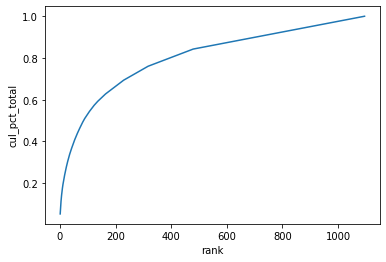

In [24]:
sns.lineplot(x='rank', y='cul_pct_total', data=wc);

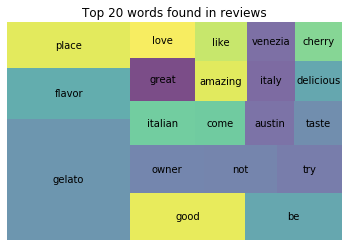

In [22]:
# top 20 words found in reviews
top_20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=top_20['pct_total'], label=top_20['word'], alpha=0.7)
plt.title('Top 20 words found in reviews')
plt.axis('off')
plt.show()

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [36]:
# Separate good reviews from bad reviews
good = count(shops[shops['review_rating'] == 'good']['lemmas'])
bad = count(shops[shops['review_rating'] == 'bad']['lemmas'])

print(good.head(10))
bad.head(10)

        word  appears_in  count  rank  pct_total  cul_pct_total  \
32    gelato         178    408   1.0   0.055707       0.055707   
66    flavor          86    162   2.0   0.022119       0.077826   
68     place         102    144   3.0   0.019661       0.097488   
20      good          98    144   4.0   0.019661       0.117149   
27        be          70    122   5.0   0.016658       0.133807   
39     owner          82     92   6.0   0.012561       0.146368   
56       not          58     92   7.0   0.012561       0.158930   
35   italian          64     78   8.0   0.010650       0.169579   
25       try          60     78   9.0   0.010650       0.180229   
173    great          56     74  10.0   0.010104       0.190333   

     appears_in_pct  
32         0.917526  
66         0.443299  
68         0.525773  
20         0.505155  
27         0.360825  
39         0.422680  
56         0.298969  
35         0.329897  
25         0.309278  
173        0.288660  


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
87,place,6,14,1.0,0.027451,0.027451,1.000000
95,2,4,10,2.0,0.019608,0.047059,0.666667
21,customer,2,10,3.0,0.019608,0.066667,0.333333
85,flavor,4,10,4.0,0.019608,0.086275,0.666667
71,male,2,8,5.0,0.015686,0.101961,0.333333
50,rude,2,8,6.0,0.015686,0.117647,0.333333
47,gelato,6,8,7.0,0.015686,0.133333,1.000000
37,try,2,8,8.0,0.015686,0.149020,0.333333
42,review,2,6,9.0,0.011765,0.160784,0.333333
2,love,2,6,10.0,0.011765,0.172549,0.333333


In [30]:
# Get top 20 words used in good reviews
good_20 = good[good['rank'] <= 20]

# Get top 20 words used in bad reviews
bad_20 = bad[bad['rank'] <= 20]

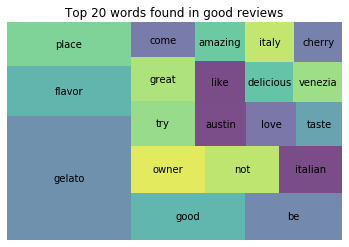

In [31]:
# Plot top 20 words for good reviews
squarify.plot(sizes=good_20['pct_total'], label=good_20['word'], alpha=0.7)
plt.title('Top 20 words found in good reviews')
plt.axis('off')
plt.show()

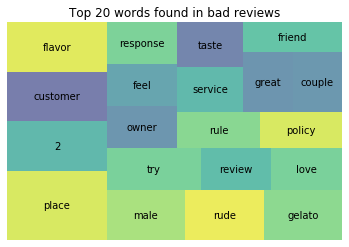

In [32]:
# Plot top 20 words for bad reviews
squarify.plot(sizes=bad_20['pct_total'], label=bad_20['word'], alpha=0.7)
plt.title('Top 20 words found in bad reviews')
plt.axis('off')
plt.show()

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play the the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

